In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import nasapy
import nasa



from api_keys import api_key


In [13]:
Asteroids = pd.read_csv("Asteroid.csv")
Asteroids

,Date,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,2019-01-01,3837557,(2019 AN),24.200,8.368577,2019-01-01,0.085909,0.038420,False,1.910837e+07,Earth
1,2019-01-01,3398654,(2007 YS56),25.700,6.461135,2019-01-01,0.043057,0.019256,False,1.798761e+07,Earth
2,2019-01-01,3398652,(2007 YQ56),19.900,15.429487,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
3,2019-01-01,3837538,(2018 YV2),24.200,11.718652,2019-01-01,0.085909,0.038420,False,1.022072e+07,Earth
4,2019-01-01,3771017,(2017 EV2),20.800,13.642474,2019-01-01,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...
5044,2019-12-31,2006239,6239 Minos (1989 QF),18.500,9.007412,2019-12-31,1.185878,0.530341,True,6.346829e+07,Earth
5045,2019-12-31,3555072,(2011 AH5),26.000,17.980102,2019-12-31,0.037501,0.016771,False,4.341405e+07,Earth
5046,2019-12-31,3976544,(2020 AA2),27.000,9.714685,2019-12-31,0.023661,0.010582,False,1.643657e+06,Earth
5047,2019-12-31,3893722,(2019 WR4),26.065,4.236817,2019-12-31,0.036395,0.016276,False,4.493435e+06,Earth


In [14]:
Asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     5049 non-null   object 
 1   ID                       5049 non-null   int64  
 2   Name                     5049 non-null   object 
 3   Absolute Magnitude       5049 non-null   float64
 4   Relative Velocity (k/s)  5049 non-null   float64
 5   Close Approach Date      5049 non-null   object 
 6   Estimated Max Diameter   5049 non-null   float64
 7   Estimated Min Diameter   5049 non-null   float64
 8   Potentially Hazardous?   5049 non-null   bool   
 9   Miss Distance (km)       5049 non-null   float64
 10  Orbiting Body            5049 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 399.5+ KB


In [15]:
Asteroids["ID"].nunique()

4510

In [16]:
Asteroids_by_ID=Asteroids.groupby('ID')
Asteroids_by_ID.head()

,Date,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,2019-01-01,3837557,(2019 AN),24.200,8.368577,2019-01-01,0.085909,0.038420,False,1.910837e+07,Earth
1,2019-01-01,3398654,(2007 YS56),25.700,6.461135,2019-01-01,0.043057,0.019256,False,1.798761e+07,Earth
2,2019-01-01,3398652,(2007 YQ56),19.900,15.429487,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
3,2019-01-01,3837538,(2018 YV2),24.200,11.718652,2019-01-01,0.085909,0.038420,False,1.022072e+07,Earth
4,2019-01-01,3771017,(2017 EV2),20.800,13.642474,2019-01-01,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...
5044,2019-12-31,2006239,6239 Minos (1989 QF),18.500,9.007412,2019-12-31,1.185878,0.530341,True,6.346829e+07,Earth
5045,2019-12-31,3555072,(2011 AH5),26.000,17.980102,2019-12-31,0.037501,0.016771,False,4.341405e+07,Earth
5046,2019-12-31,3976544,(2020 AA2),27.000,9.714685,2019-12-31,0.023661,0.010582,False,1.643657e+06,Earth
5047,2019-12-31,3893722,(2019 WR4),26.065,4.236817,2019-12-31,0.036395,0.016276,False,4.493435e+06,Earth


In [50]:
single_asteroid=Asteroids.drop_duplicates("ID",keep='first')
single_asteroid.count()

Date                       4510
ID                         4510
Name                       4510
Absolute Magnitude         4510
Relative Velocity (k/s)    4510
Close Approach Date        4510
Estimated Max Diameter     4510
Estimated Min Diameter     4510
Potentially Hazardous?     4510
Miss Distance (km)         4510
Orbiting Body              4510
dtype: int64

In [49]:
Asteroids.count()

Date                       5049
ID                         5049
Name                       5049
Absolute Magnitude         5049
Relative Velocity (k/s)    5049
Close Approach Date        5049
Estimated Max Diameter     5049
Estimated Min Diameter     5049
Potentially Hazardous?     5049
Miss Distance (km)         5049
Orbiting Body              5049
dtype: int64

In [58]:
Pos_Hazard=single_asteroid.loc[single_asteroid["Potentially Hazardous?"] == True]
Pos_Hazard

,Date,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,2019-01-01,3398652,(2007 YQ56),19.9,15.429487,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
8,2019-01-01,2527715,527715 (2007 YQ56),19.9,15.429488,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
32,2019-01-03,2357022,357022 (1999 YG3),19.0,25.901881,2019-01-03,0.941976,0.421265,True,4.865035e+07,Earth
38,2019-01-04,3263453,(2004 XP14),19.4,17.176591,2019-01-04,0.783502,0.350393,True,1.093730e+07,Earth
55,2019-01-05,2267729,267729 (2003 FC5),18.3,13.317079,2019-01-05,1.300289,0.581507,True,3.724010e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...
4978,2019-12-26,2310442,310442 (2000 CH59),19.9,12.273017,2019-12-26,0.622358,0.278327,True,7.291408e+06,Earth
4990,2019-12-27,2267221,267221 (2001 AD2),19.7,25.924487,2019-12-27,0.682402,0.305179,True,2.097858e+07,Earth
4996,2019-12-28,2136849,136849 (1998 CS1),17.6,32.012844,2019-12-28,1.794899,0.802703,True,6.997161e+07,Earth
5003,2019-12-28,3893728,(2019 WX4),21.0,17.719711,2019-12-28,0.375008,0.167708,True,4.165681e+07,Earth


In [64]:
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()

<BarContainer object of 409 artists>

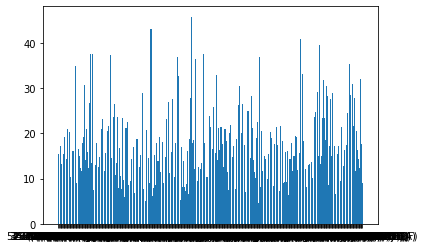

In [62]:
plt.bar(Pos_Hazard["Name"], Pos_Hazard["Relative Velocity (k/s)"])

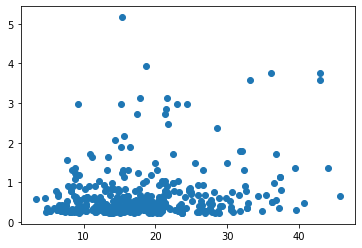

In [60]:
plt.scatter(Pos_Hazard["Relative Velocity (k/s)"], Pos_Hazard["Estimated Max Diameter"])

In [ ]:
plt.scatter(Pos_Hazard["Relative Velocity (k/s)"], Pos_Hazard["Estimated Max Diameter"])